In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import random

1. Visit the following sites and check what kind of data can you acquire and what kind of visualization
can you make. Download a chosen data set and draw as a network.


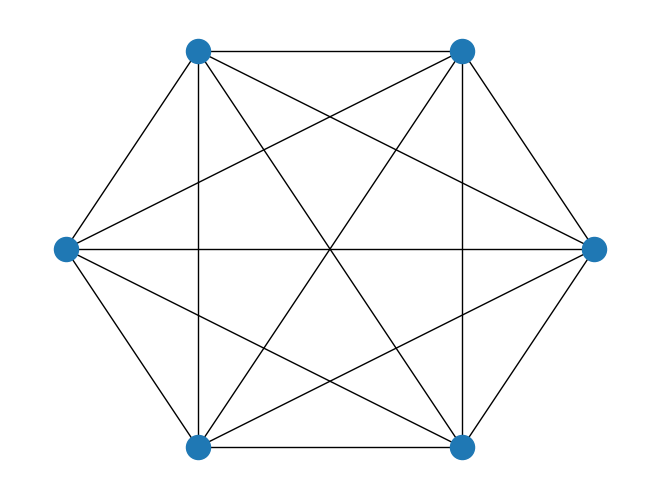

In [2]:
fishy_graph = nx.read_edgelist("./datasets/fish-guppy-familiar-1.edges", nodetype=int, data=(("weight", float),))
nx.draw_circular(fishy_graph)
plt.show()

2. Go to Stanford Large Network Dataset Collection by Jure Leskovec
(https://snap.stanford.edu/data/index.html) and download data for the social circles from
Facebook (ego-Facebook).

In [3]:
fb_graph = nx.read_edgelist("./facebook_combined.txt.gz")

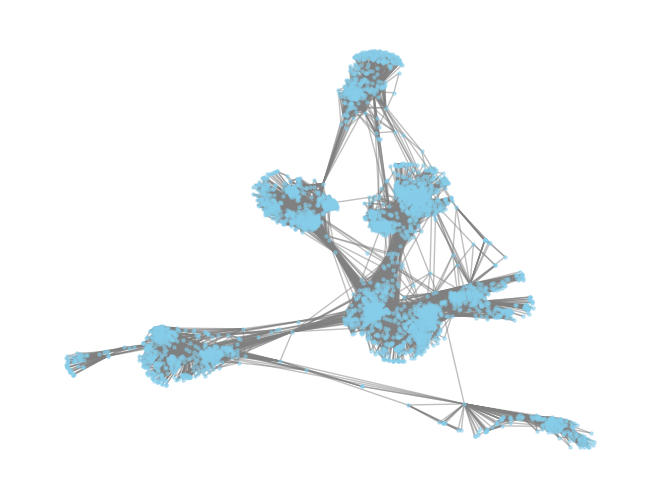

In [3]:
layout = nx.spring_layout(fb_graph)
nx.draw(fb_graph, pos=layout,node_size=5, node_color='skyblue', edge_color='gray', alpha=0.5)
plt.show()

2. Calculate for this network:
(a) Degree distribution P(k) and an average degree < k >


average degree < k >:  43.69101262688784


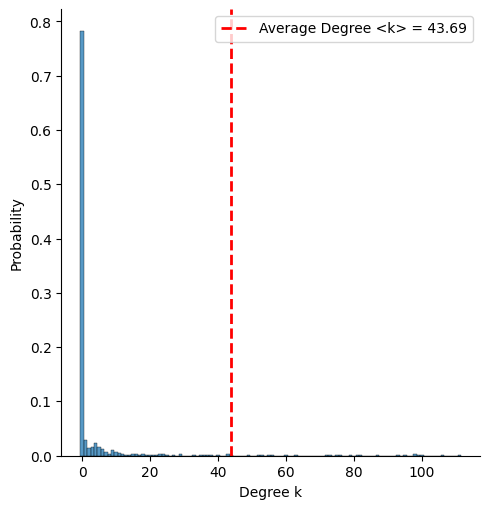

In [6]:
hist = nx.degree_histogram(fb_graph)
sns.displot(hist, stat="probability",discrete=True)
plt.xlabel("Degree k")
plt.ylabel("Probability")

avg_deg = sum(dict(fb_graph.degree()).values()) / len(fb_graph)
print("average degree < k >: ", avg_deg)
# outupt: average degree < k >: 43.69101262688784
plt.axvline(x=avg_deg, color='red', linestyle='dashed', linewidth=2, label=f'Average Degree <k> = {avg_deg:.2f}')
plt.legend()
plt.show()

(b) Distribution of clustering coefficients and an average clustering coefficient.

average clustering coefficient:  0.6055467186200862


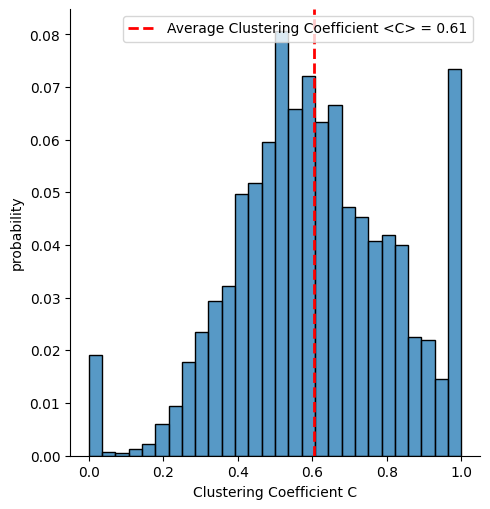

In [9]:
clustering_coefficients = nx.clustering(fb_graph)
sns.displot(clustering_coefficients, stat="probability")
plt.xlabel("Clustering Coefficient C")
plt.ylabel("probability")

avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
print("average clustering coefficient: ", avg_clustering_coefficient)
# output: average clustering coefficient: 0.6055467186200862
plt.axvline(x=avg_clustering_coefficient, color='red', linestyle='dashed', linewidth=2, label=f'Average Clustering Coefficient <C> = {avg_clustering_coefficient:.2f}')
plt.legend()
plt.show()

(c) Distribution of the shortest paths, the diameter and the average path length.

the diameter:  8
the average path length:  3.6925068496963913


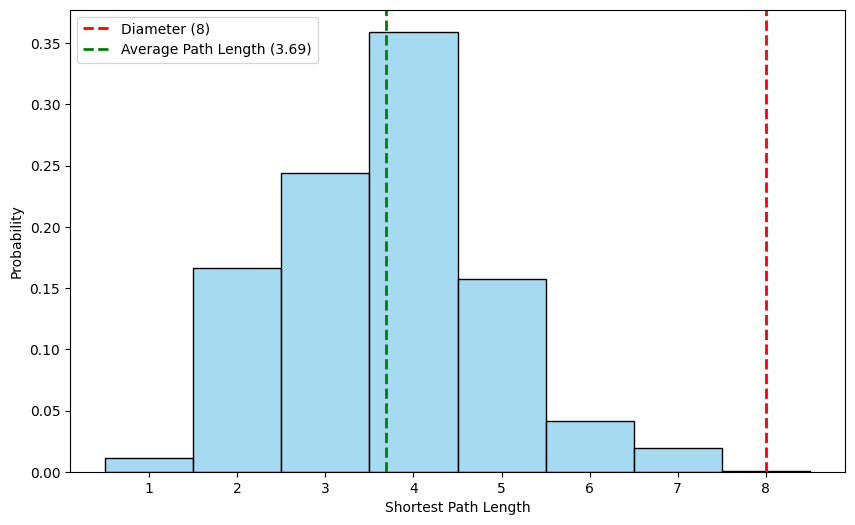

In [13]:
node_pairs = nx.all_pairs_shortest_path_length(fb_graph)

shortest_paths = [length for source, lengths in node_pairs for target, length in lengths.items() if source != target]
plt.figure(figsize=(10, 6)) 
sns.histplot(shortest_paths, stat="probability", discrete=True, kde=False, color='skyblue', bins=range(min(shortest_paths), max(shortest_paths)+1, 1))
plt.xlabel("Shortest Path Length")
plt.ylabel("Probability")


diameter=nx.diameter(fb_graph)
print("the diameter: ",diameter)
# output: the diameter:  8

avg_shortest_path_length= nx.average_shortest_path_length(fb_graph)
print("the average path length: ", avg_shortest_path_length)
# output: the average path length:  3.6925068496963913

# Add vertical lines for diameter and average path length
plt.axvline(x=diameter, color='red', linestyle='dashed', linewidth=2, label=f'Diameter ({diameter})')
plt.axvline(x=avg_shortest_path_length, color='green', linestyle='dashed', linewidth=2, label=f'Average Path Length ({avg_shortest_path_length:.2f})')

plt.legend()
plt.show()

3. Create the following random graphs. Implement at least one by yourself, for the rest you can use
some libraries (e.g. NetworkX). Check online http://networksciencebook.com:

In [8]:
def visualize_graph(adjacency_matrix):
    G = nx.Graph(adjacency_matrix)
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray')
    plt.title('Erdos-Renyi Graph')
    plt.show()

(a) Erdos-Renyi model G(N, L), in which N vertices are connected with L randomly placed
edges.

In [6]:
def erdos_renyi_model(N,L):
    adj_matrix = [[0] * N for _ in range(N)]
    edges_added = 0
    while edges_added < L:
        vertex1 = random.randint(0, N - 1)
        vertex2 = random.randint(0, N - 1)

        if vertex1 != vertex2 and adj_matrix[vertex1][vertex2] == 0 and adj_matrix[vertex2][vertex1] == 0:
            adj_matrix[vertex1][vertex2] = 1
            adj_matrix[vertex2][vertex1] = 1
            edges_added += 1

    return adj_matrix

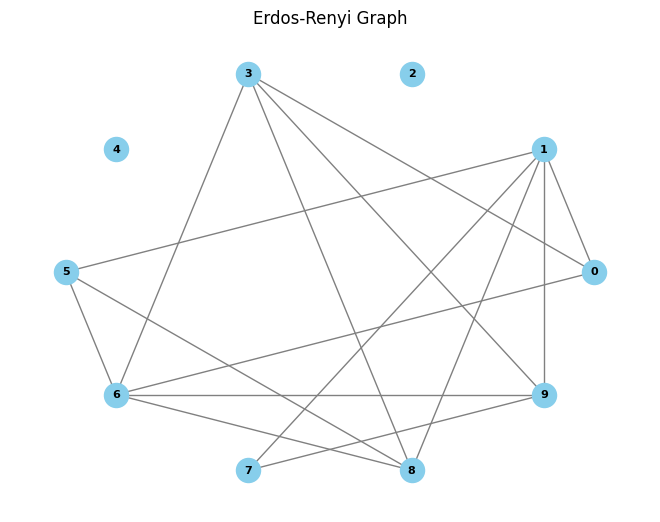

In [11]:
random_graph =np.array(erdos_renyi_model(10, 15))
visualize_graph(random_graph)
plt.show()

(b) Erd¨os-R´enyi-Gilbert model G(N, p), in which each pair (i, j), i, j = 1, ..., N of vertices is
connected (there is an edges between them) with probability p.


In [36]:
def random_p_erdos_renyi_model(N, p):
    adj_matrix = [[0] * N for _ in range(N)]
    for i in range(N):
        for j in range(i+1, N):
            if random.random() < p:
                adj_matrix[i][j] = 1
                adj_matrix[j][i] = 1

    return adj_matrix

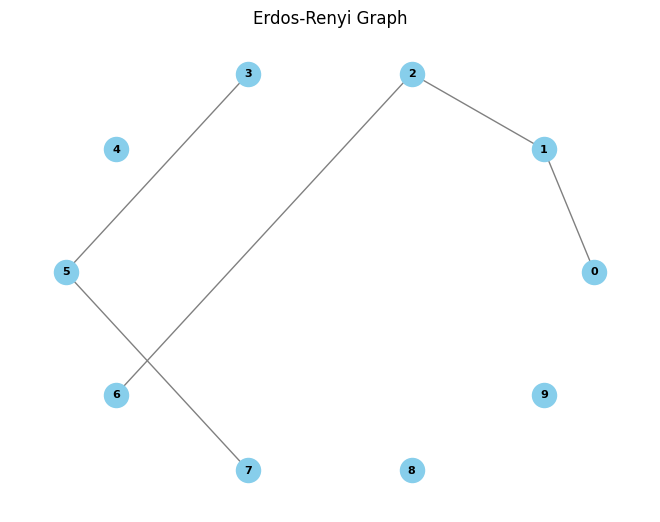

In [40]:
random_graph_p_model = random_p_erdos_renyi_model(10, 0.15)
visualize_graph(np.array(random_graph_p_model))

(c) Watts and Strogatz model W S(N, k, β). Within this model we start from the regular
graph of size N , usually a ring of nodes, i.e. one-dimensional lattice with periodic boundary
conditions. Each node is initially linked to its k neighbors, i.e. for the ring and k = 2 only to
the nearest neighbors (nn), for k to the nn and next nearest neighbors (nnn), and so on. The
same can be done for any other regular graph like the square lattice, but here use the most
typical structure, namely the ring with k = 4. With probability β each link is rewired to a
randomly chosen node.

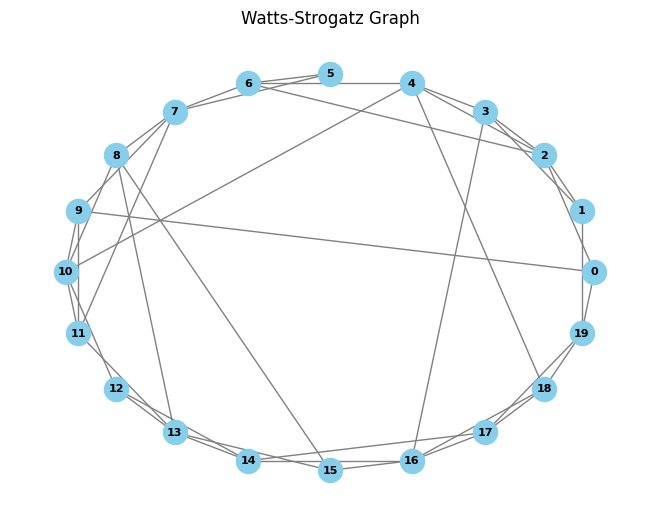

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def watts_strogatz_graph(N, k, beta):
    # Create a ring lattice
    ring_lattice = nx.watts_strogatz_graph(N, k, beta)

    return ring_lattice

def visualize_graph(G):
    pos = nx.circular_layout(G)  # Circular layout for better visualization

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray')

    plt.title('Watts-Strogatz Graph')
    plt.show()

# Example usage:
N = 20  # Number of nodes
k = 4   # Each node is initially connected to its k neighbors
beta = 0.2  # Probability of rewiring each edge

watts_strogatz_graph = watts_strogatz_graph(N, k, beta)

# Visualize the graph
visualize_graph(watts_strogatz_graph)


Implement ONE model of random network in Python and show results:
(a) Degree distribution P (k) and an average degree < k >.
(b) Distribution of clustering coefficients and an average clustering coefficient.
(c) Distribution of the shortest paths, the diameter and the average path length.
Erdos-Renyi model was chosen 

average degree < k >:  3.0


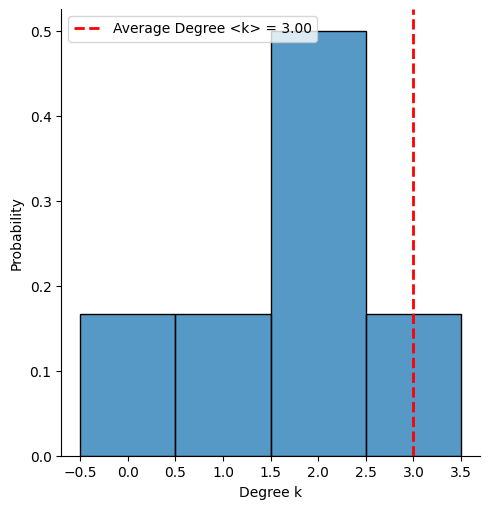

average clustering coefficient:  0.3933333333333333


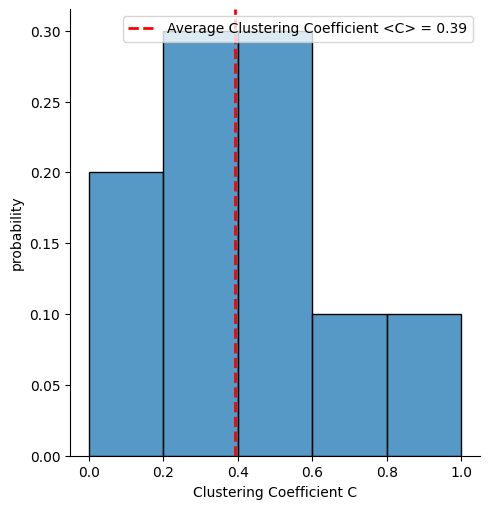

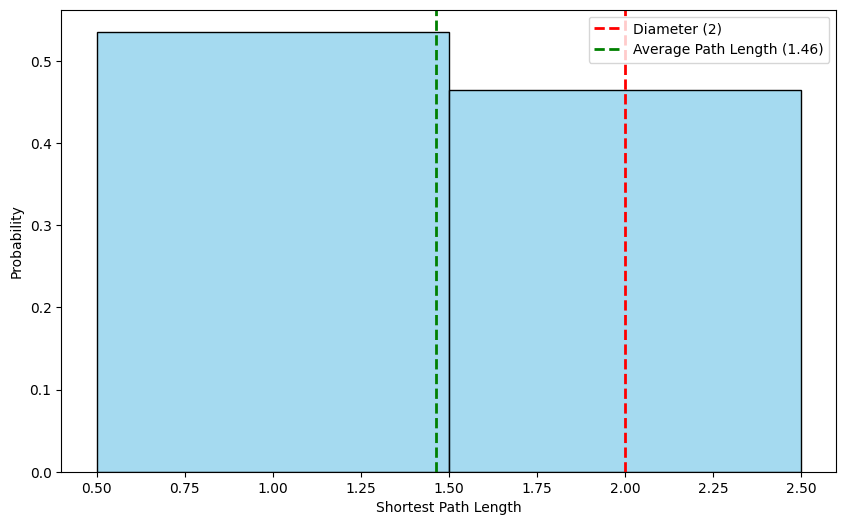

In [16]:
random_graph = nx.Graph(random_graph)

hist = nx.degree_histogram(random_graph)
sns.displot(hist, stat="probability",discrete=True)
plt.xlabel("Degree k")
plt.ylabel("Probability")

avg_deg = sum(dict(random_graph.degree()).values()) / len(random_graph)
print("average degree < k >: ", avg_deg)
plt.axvline(x=avg_deg, color='red', linestyle='dashed', linewidth=2, label=f'Average Degree <k> = {avg_deg:.2f}')
plt.legend()
plt.show()

clustering_coefficients = nx.clustering(random_graph)
sns.displot(clustering_coefficients, stat="probability")
plt.xlabel("Clustering Coefficient C")
plt.ylabel("probability")

avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
print("average clustering coefficient: ", avg_clustering_coefficient)
plt.axvline(x=avg_clustering_coefficient, color='red', linestyle='dashed', linewidth=2, label=f'Average Clustering Coefficient <C> = {avg_clustering_coefficient:.2f}')
plt.legend()
plt.show()

node_pairs = nx.all_pairs_shortest_path_length(random_graph)

shortest_paths = [length for source, lengths in node_pairs for target, length in lengths.items() if source != target]
plt.figure(figsize=(10, 6)) 
sns.histplot(shortest_paths, stat="probability", discrete=True, kde=False, color='skyblue', bins=range(min(shortest_paths), max(shortest_paths)+1, 1))
plt.xlabel("Shortest Path Length")
plt.ylabel("Probability")


if not nx.is_connected(random_graph):
    connected_components = max(nx.connected_components(random_graph), key=len)
    largest_component = random_graph.subgraph(connected_components)
    diameter = nx.diameter(largest_component)
    avg_shortest_path_length = nx.average_shortest_path_length(largest_component)
    plt.axvline(x=diameter, color='red', linestyle='dashed', linewidth=2, label=f'Diameter ({diameter})')
    plt.axvline(x=avg_shortest_path_length, color='green', linestyle='dashed', linewidth=2, label=f'Average Path Length ({avg_shortest_path_length:.2f})')
    plt.legend()
    plt.show()
else:
    diameter = nx.diameter(random_graph)
    avg_shortest_path_length = nx.average_shortest_path_length(random_graph)
    plt.axvline(x=diameter, color='red', linestyle='dashed', linewidth=2, label=f'Diameter ({diameter})')
    plt.axvline(x=avg_shortest_path_length, color='green', linestyle='dashed', linewidth=2, label=f'Average Path Length ({avg_shortest_path_length:.2f})')
    plt.legend()
    plt.show()